In [5]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from sklearn import feature_extraction


In [6]:
df = pd.read_csv('orderItems.csv')

In [7]:
df = df.fillna('')

In [8]:
df.head()

,orders_id,customer_id,date_purchased,shipping_type,shop_id,eta_min,placed_via,product_name,product_type_name,product_type_price,product_description,product_category_name
0,17834429,4197790,6/1/19 0:03,Pickup,13882,,androidapp,Chicken Cordon Bleu Pizza,"Large 16"" (12 Slices)",16.95,"Red. Chunks of chicken, ham, mozzarella, and p...",Gourmet Pizza
1,17834600,4197625,6/1/19 0:05,Delivery,18495,75,iosapp,Tasty Garlic Bread with Marinara Sauce & Mozza...,Appetizer,4.75,A whole loaf of Italian bread toasted with mar...,Starters
2,17834789,4197926,6/1/19 0:07,Delivery,4313,65,web,Soda,6 Pack,4.45,,Beverages
3,17835823,4198178,6/1/19 0:19,Delivery,9816,45,web,Traditional Plain Cheese Pizza,Small 12'' (6 Cut),8.00,Classic cheese or create your own pizza.,Pizza
4,17836548,4198000,6/1/19 0:28,Delivery,7885,,iosapp,Onion Rings,Side,4.99,,Side Orders


In [9]:
df['text'] = df['product_name'] + ' ' + df['product_type_name'] + ' ' + df['product_description']

In [10]:
df.loc[df['text'].isna() == 0]

,orders_id,customer_id,date_purchased,shipping_type,shop_id,eta_min,placed_via,product_name,product_type_name,product_type_price,product_description,product_category_name,text
0,17834429,4197790,6/1/19 0:03,Pickup,13882,,androidapp,Chicken Cordon Bleu Pizza,"Large 16"" (12 Slices)",16.95,"Red. Chunks of chicken, ham, mozzarella, and p...",Gourmet Pizza,"Chicken Cordon Bleu Pizza Large 16"" (12 Slices..."
1,17834600,4197625,6/1/19 0:05,Delivery,18495,75,iosapp,Tasty Garlic Bread with Marinara Sauce & Mozza...,Appetizer,4.75,A whole loaf of Italian bread toasted with mar...,Starters,Tasty Garlic Bread with Marinara Sauce & Mozza...
2,17834789,4197926,6/1/19 0:07,Delivery,4313,65,web,Soda,6 Pack,4.45,,Beverages,Soda 6 Pack
3,17835823,4198178,6/1/19 0:19,Delivery,9816,45,web,Traditional Plain Cheese Pizza,Small 12'' (6 Cut),8.00,Classic cheese or create your own pizza.,Pizza,Traditional Plain Cheese Pizza Small 12'' (6 C...
4,17836548,4198000,6/1/19 0:28,Delivery,7885,,iosapp,Onion Rings,Side,4.99,,Side Orders,Onion Rings Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163027,22955743,4254872,11/29/19 22:40,Delivery,13757,45,iosapp,Plain Cheese Pizza,Large 16'',12.95,Tomato sauce & mozzarella. Classic cheese or c...,Pizza,Plain Cheese Pizza Large 16'' Tomato sauce & m...
163028,22955772,4383741,11/29/19 22:40,Delivery,14328,,iosapp,Marinara Sauce,Side,2.00,"Tomato, parsley, garlic, oregano, onion.",Side Orders,"Marinara Sauce Side Tomato, parsley, garlic, o..."
163029,22956437,4319464,11/29/19 22:47,Delivery,16358,30,iosapp,Buffalo Wings,20 Pieces,13.80,"Chicken wings breaded and fried, then tossed i...",Wings,Buffalo Wings 20 Pieces Chicken wings breaded ...
163030,22962256,4792943,11/29/19 23:49,Delivery,12754,,web,Cheese Pizza,Large 16'',11.95,Classic cheese or create your own pizza.,New York Style Pizza,Cheese Pizza Large 16'' Classic cheese or crea...


In [11]:
df[['shop_id','product_category_name']].groupby(['shop_id','product_category_name'])['product_category_name'] \
                             .count() 
                             

shop_id  product_category_name
2026     Appetizers               120
         Beverages                 52
         Calzones & Strombolis     15
         Cold Heroes               14
         Desserts                   6
                                 ... 
35886    Sicilian Pizza            21
         Specials                  10
         Specialty Pizza          108
         White Pizza               52
         Wings                     42
Name: product_category_name, Length: 2178, dtype: int64

In [12]:
df.reset_index(inplace=True)

In [13]:

nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')


# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/craigledgerwood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/craigledgerwood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import spacy

In [79]:
sp = spacy.load('en_core_web_sm')

In [87]:
sentence = df.loc[0,'text']

In [91]:
sentence2 = sp(sentence)

In [95]:
for noun in sentence2.noun_chunks:
    print(noun.text)

Chicken Cordon Bleu Pizza
(12 Slices) Red
Chunks
chicken
ham
mozzarella
parmesan cheese


In [20]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [16]:

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = tknzr.tokenize(text)
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens = [word for word in filtered_tokens if word not in stopwords]        
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = tknzr.tokenize(text)
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens = [word for word in filtered_tokens if word not in stopwords]  
    return filtered_tokens

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(df['text']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 44.9 s, sys: 122 ms, total: 45.1 s
Wall time: 45.1 s
(163032, 181)


In [18]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(tfidf_matrix)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

NameError: name 'plt' is not defined

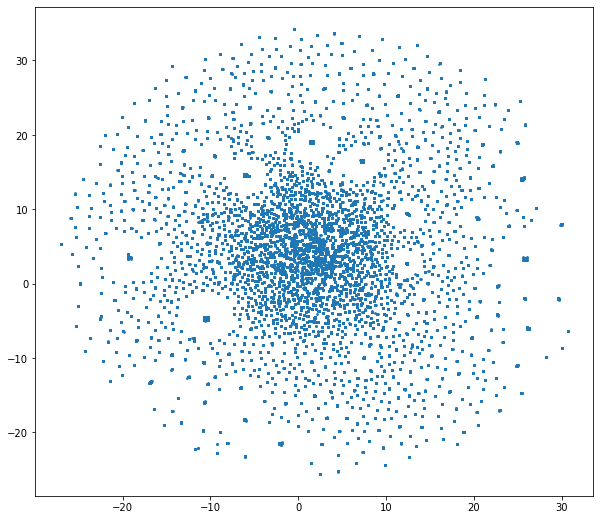

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [33]:
terms = tfidf_vectorizer.get_feature_names()

In [38]:
from sklearn.cluster import KMeans, MiniBatchKMeans

num_clusters = 12

km = MiniBatchKMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 763 ms, sys: 3.13 ms, total: 766 ms
Wall time: 765 ms


In [39]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'items_cluster.pkl')

km = joblib.load('items_cluster.pkl')
clusters = km.labels_.tolist()

In [40]:
df.index = clusters
df['cluster'] = clusters

In [41]:
df['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

4     68651
5     24659
1      9776
3      9626
6      8878
9      8566
10     8061
0      7598
8      7068
2      5692
7      2669
11     1788
Name: cluster, dtype: int64

#### df['imdbRating'] = df['imdbRating'].astype('float')

In [42]:

grouped = df['product_type_price'].groupby(df['cluster']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

cluster
0      6.202101
1     10.189205
2     11.301154
3     10.669181
4     10.138051
5     12.841943
6      5.374114
7      3.924275
8      6.630471
9     18.282761
10     2.477490
11     7.872254
Name: product_type_price, dtype: float64

In [43]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df['text'].tolist():
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 1268606 items in vocab_frame


In [44]:
terms = tfidf_vectorizer.get_feature_names()

In [45]:
terms

["'s",
 'alfredo',
 'american',
 'american cheese',
 'appetizer',
 'bacon',
 'baked',
 'basil',
 'bbq',
 'beef',
 'black',
 'black olives',
 'blue',
 'blue cheese',
 'bread',
 'breaded',
 'broccoli',
 'buffalo',
 'buffalo chicken',
 'buffalo wings',
 'butter',
 'caesar',
 'caesar salad',
 'calzone',
 'cheddar',
 'cheddar cheese',
 'cheese',
 'cheese create',
 'cheese pizza',
 'cheeseburger',
 'cheesesteak',
 'chicken',
 'chicken fingers',
 'chicken pizza',
 'chicken wings',
 'choice',
 'classic',
 'classic cheese',
 'coupon',
 'create',
 'create new',
 'create pizza',
 'crispy',
 'croutons',
 'crust',
 'cucumbers',
 'dessert',
 'dinner',
 'dressing',
 'entree',
 'feta',
 'feta cheese',
 'fingers',
 'french',
 'french fries',
 'fresh',
 'fresh mozzarella',
 'fried',
 'fries',
 'fries appetizer',
 'garden',
 'garlic',
 'garlic bread',
 'garlic knots',
 'greek',
 'green',
 'green peppers',
 'grilled',
 'grilled chicken',
 'ham',
 'ham salami',
 'hand',
 'homemade',
 'honey',
 'hot',
 'ita

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
cluster_names = dict()
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    centroid_terms = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        centroid_terms.append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in df.ix[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    cluster_names[i] = centroid_terms
print()
print()

In [26]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :1]:
        print(' %s' % df.iloc[ind]['text'], end='')
    print()

Cluster 0: Mussels Marinara Small 
Cluster 1: Butter Paneer Masala Veggie Pizza Medium 12'' (8 Slices) Butter paneer marinated in Can-Am special curry sauce, jalapenos, onions, green peppers, tomatoes, mozzarella cheese and pizza sauce.
Cluster 2: Soda 20 oz. 
Cluster 3: Create Your Own New York Pizza Large 18'' Classic cheese or create your own pizza.
Cluster 4: Mozzarella Cheese Pizza Large 16" Classic cheese or create your own pizza.
Cluster 5: Soda 20 oz. We proudly serve Pepsi products.
Cluster 6: Onion Rings Side 
Cluster 7: Large Combo for $17.99 Coupon Large two toppings pizza & any appetizer.
Cluster 8: Cheesesteak Sandwich 12'' With American or choice of mozzarella, provolone or cheddar
Cluster 9: Chicken Cutlet Parmesan Entree Topped with homemade tomato sauce and melted mozzarella cheese.
Cluster 10: Grape Leaves 6 Pieces 
Cluster 11: Large 16'' One Topping Pizza Special Special 


In [27]:
order_centroids

array([[ 22,  77,  19, ...,  30,  52,  28],
       [114,  64,  26, ...,  76,  78,   0],
       [ 70,  95,  25, ...,  72,  74,  57],
       ...,
       [ 77,  19,  26, ...,  37,  36,  57],
       [ 31,   5,  64, ...,  63,  95,  57],
       [ 95,  55,  25, ...,  70,  71,  57]])

In [108]:
order_centroids

array([[ 72, 101,  41, ...,  91,  27,  29],
       [ 76,  18,  25, ...,  29,  62,  56],
       [ 76,  73,  74, ..., 107, 110,  94],
       ...,
       [ 91,  76,  18, ...,  35,  34,  56],
       [ 85,  53,  15, ..., 105, 110,   0],
       [ 24, 105,  52, ...,  33,  32,   0]])

In [41]:

from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
cluster_names = dict()
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    centroid_terms = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        centroid_terms.append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in df.ix[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    cluster_names[i] = centroid_terms
print()
print()

Top terms per cluster:

Cluster 0 words: b'tells', b'saying', b'asks', b'man', b'leaves', b'kill',

Cluster 0 titles: The Shawshank Redemption, The Dark Knight, Pulp Fiction, Fight Club, Inception, The Matrix, Se7en, It's a Wonderful Life, Spirited Away, Saving Private Ryan, The Usual Suspects, Léon: The Professional, The Green Mile, Psycho, American History X, Once Upon a Time in the West, The Departed, Back to the Future, Terminator 2: Judgment Day, Whiplash, The Lion King, Rear Window, The Prestige, Memento, Alien, The Lives of Others, Paths of Glory, Django Unchained, The Shining, Princess Mononoke, Oldboy, The Dark Knight Rises, Citizen Kane, Vertigo, North by Northwest, Your Name., Reservoir Dogs, Toy Story, 2001: A Space Odyssey, A Clockwork Orange, Double Indemnity, Taxi Driver, To Kill a Mockingbird, The Sting, Snatch, Scarface, L.A. Confidential, Rashomon, All About Eve, Batman Begins, Some Like It Hot, Yojimbo, Unforgiven, Heat, Green Book, Pan's Labyrinth, The Third Man, Ho

In [42]:

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [43]:

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [44]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

In [45]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df1 = pd.DataFrame(dict(x=xs, y=ys, label=df['cluster'], title=df['Title'])).reset_index()

/Users/craigledgerwood/PycharmProjects/Machine_Learning/venv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/craigledgerwood/PycharmProjects/Machine_Learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


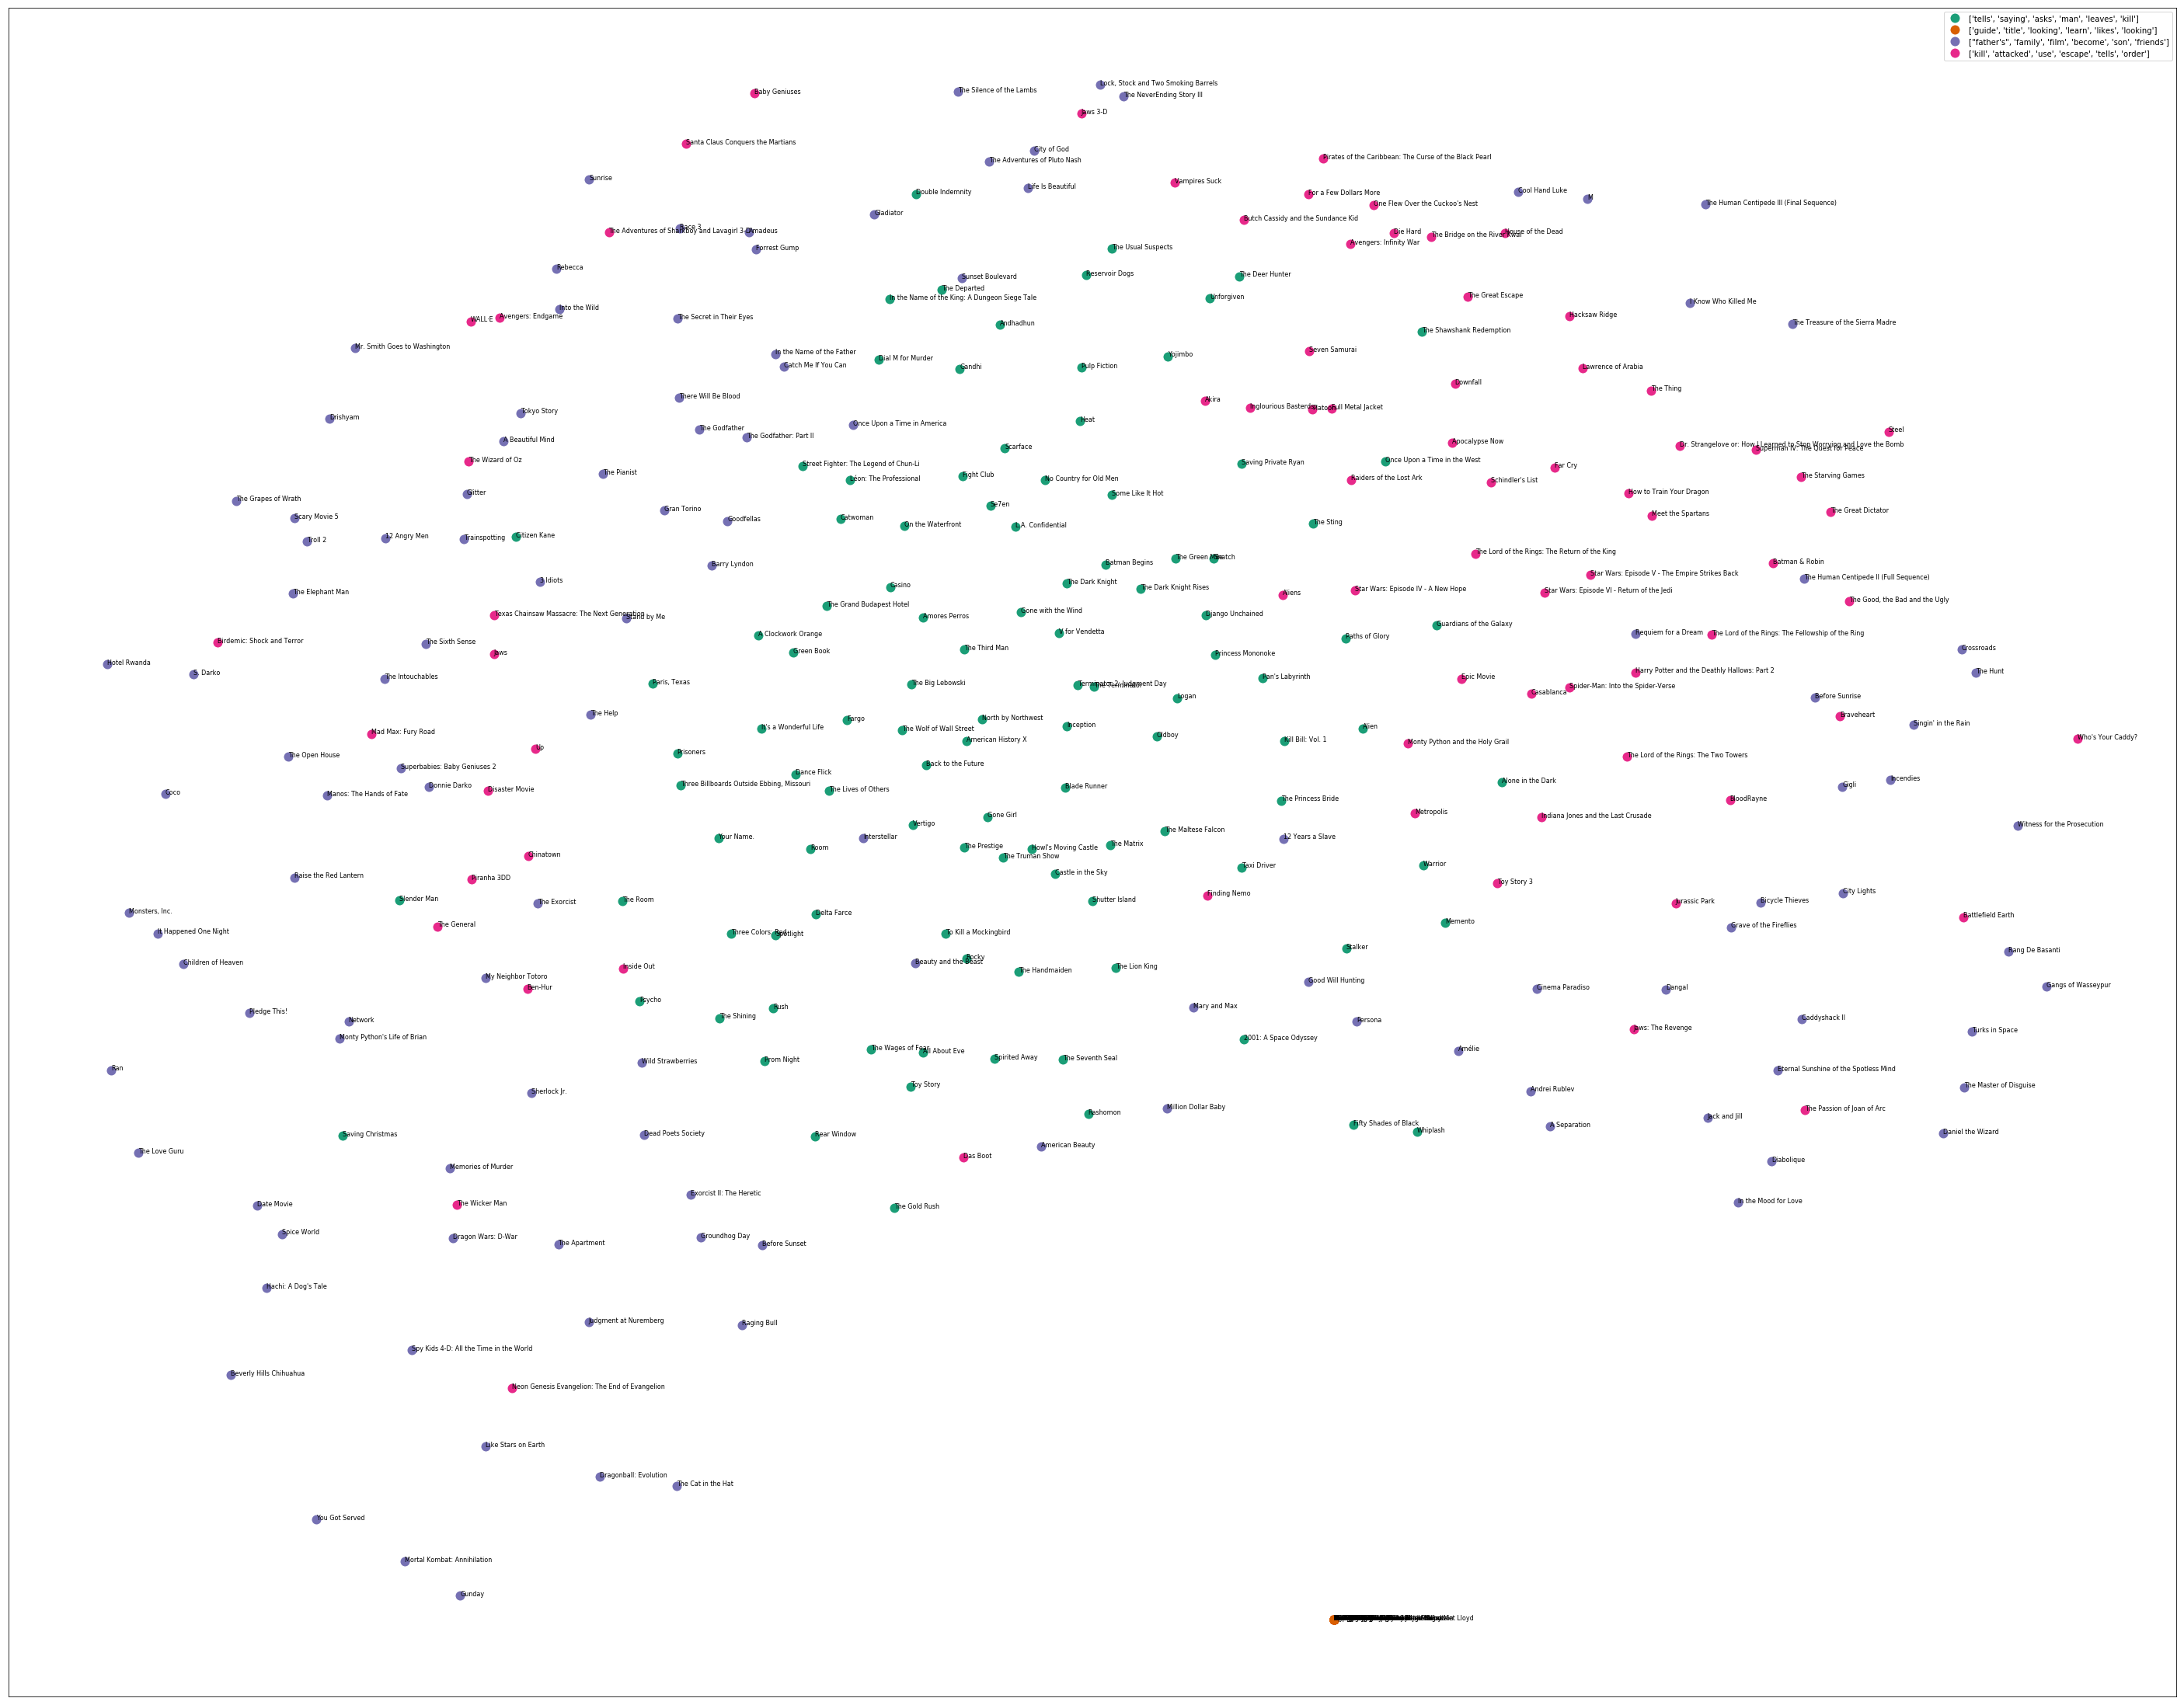

In [46]:
#group by cluster
groups = df1.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(50, 40)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df1)):
    ax.text(df1.ix[i]['x'], df1.ix[i]['y'], df1.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

KeyError: -10

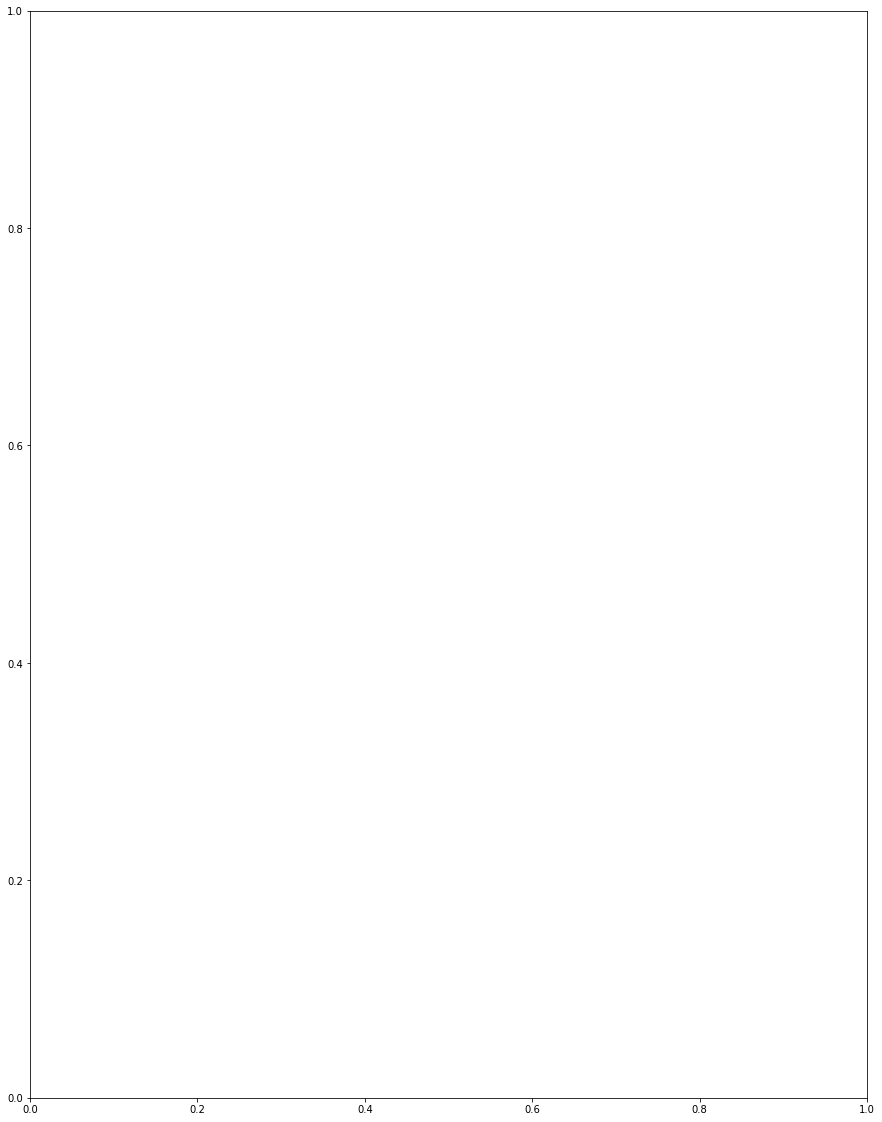

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df['Title']);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [32]:
linkage_matrix.shape

(349, 4)

In [48]:

n=0
content2=[]
for a in movie_ids:
    URL = "http://www.imdb.com/title/" + a
    r = requests.get(URL)
    content2.append(BeautifulSoup(r.content, "html.parser"))
    print("done: " + str(n))
    n+=1
budget=[]
revenue=[]
for soups in content2:
    entries=soups.findAll('div', class_="txt-block")
    try:
        budget.append(float(''.join(re.findall('\d+',(entries[9].text).split('$')[1]))))
    except:
        budget.append(np.NaN)
    try:
        revenue.append(float(''.join(re.findall('\d+',(entries[10].text).split('$')[1]))))
    except:
        revenue.append(np.NaN)

done: 0
done: 1
done: 2
done: 3
done: 4
done: 5
done: 6
done: 7
done: 8
done: 9
done: 10
done: 11
done: 12
done: 13
done: 14
done: 15
done: 16
done: 17
done: 18
done: 19
done: 20
done: 21
done: 22
done: 23
done: 24
done: 25
done: 26
done: 27
done: 28
done: 29
done: 30
done: 31
done: 32
done: 33
done: 34
done: 35
done: 36
done: 37
done: 38
done: 39
done: 40
done: 41
done: 42
done: 43
done: 44
done: 45
done: 46
done: 47
done: 48
done: 49
done: 50
done: 51
done: 52
done: 53
done: 54
done: 55
done: 56
done: 57
done: 58
done: 59
done: 60
done: 61
done: 62
done: 63
done: 64
done: 65
done: 66
done: 67
done: 68
done: 69
done: 70
done: 71
done: 72
done: 73
done: 74
done: 75
done: 76
done: 77
done: 78
done: 79
done: 80
done: 81
done: 82
done: 83
done: 84
done: 85
done: 86
done: 87
done: 88
done: 89
done: 90
done: 91
done: 92
done: 93
done: 94
done: 95
done: 96
done: 97
done: 98
done: 99
done: 100
done: 101
done: 102
done: 103
done: 104
done: 105
done: 106
done: 107
done: 108
done: 109
done: 110


## Autoencoder for dimension reduction

In [51]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import RMSprop

In [47]:
tfidf_matrix.shape

(350, 345)

In [52]:
inputVec = Input(shape=(345,))
encoded = Dense(128, activation='relu')(inputVec)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(345, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
autoencoder = Model(inputVec, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(tfidf_matrix, tfidf_matrix,
                epochs=100,
                batch_size=20,
                shuffle=True,
                validation_data=(tfidf_matrix, tfidf_matrix))

Train on 350 samples, validate on 350 samples
Epoch 1/100
350/350 [==============================] - 0s 1ms/step - loss: 0.1044 - val_loss: 0.1042
Epoch 2/100
350/350 [==============================] - 0s 250us/step - loss: 0.1042 - val_loss: 0.1041
Epoch 3/100
350/350 [==============================] - 0s 254us/step - loss: 0.1041 - val_loss: 0.1039
Epoch 4/100
350/350 [==============================] - 0s 249us/step - loss: 0.1040 - val_loss: 0.1039
Epoch 5/100
350/350 [==============================] - 0s 247us/step - loss: 0.1039 - val_loss: 0.1037
Epoch 6/100
350/350 [==============================] - 0s 258us/step - loss: 0.1038 - val_loss: 0.1036
Epoch 7/100
350/350 [==============================] - 0s 252us/step - loss: 0.1037 - val_loss: 0.1036
Epoch 8/100
350/350 [==============================] - 0s 255us/step - loss: 0.1036 - val_loss: 0.1035
Epoch 9/100
350/350 [==============================] - 0s 256us/step - loss: 0.1036 - val_loss: 0.1034
Epoch 10/100
350/350 [=======

In [ ]:
autoencoder.

In [51]:
entries=soups.findAll('div', class_="txt-block")

In [56]:
float(''.join(re.findall('\d+',(entries[9].text).split('$')[1])))

165520.0

In [61]:
entries

[<div class="txt-block">
 <h4 class="inline">Certificate:</h4>
 <span>15</span>
 <span class="ghost">|</span> <span class="see-more inline">
 <a href="/title/tt2758880/parentalguide#certification"> See all certifications</a> »
             </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Parents Guide:</h4>
 <span class="see-more inline">
 <a href="/title/tt2758880/parentalguide"> View content advisory</a> »
         </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Official Sites:</h4>
 <a href="/offsite/?page-action=offsite-bitters&amp;token=BCYmNpiLbNf53S39mcqRBAdmnvHRBfEF7aF-lmW9cIkTHjAb8xtuUJ1FtANFXvP0PlovkKxtWDxs%0D%0ALwxi5GL3tOwjLvH48MX1TnKjHSjkghkWJYWaoMd79CkpzRAsG8bJVV_KiLK4okt07B3XTl2PGAgH%0D%0AEZdV17Rubb14fGDLC4FsEJQ-a63GBdJPAEPVUPZj6bjCxTYcY7vB6fQHynO64VdnHyrjnAX27Sd2%0D%0A7qJIQGJybnw%0D%0A" rel="nofollow">Official site [Japan]</a>
 <span class="see-more inline">
 </span>
 </div>, <div class="txt-block">
 <h4 class="inline">Country:</h4>
 <a href="/se

In [62]:
content2[0]


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt0111161?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>The Shawshank Redemption (1994) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="htt

In [63]:
movie_info

[['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provided.'],
 ['False', 'No API key provi

In [64]:
df

,Response,Error
0,False,No API key provided.
1,False,No API key provided.
2,False,No API key provided.
3,False,No API key provided.
4,False,No API key provided.
5,False,No API key provided.
6,False,No API key provided.
7,False,No API key provided.
8,False,No API key provided.
9,False,No API key provided.
